In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data_15 = pd.read_csv("2015.csv")
data_16 = pd.read_csv("2016.csv")
data_17 = pd.read_csv("2017.csv")
data_18 = pd.read_csv("2018.csv")
data_19 = pd.read_csv("2019.csv")
data_20 = pd.read_csv("2020.csv")
data_21 = pd.read_csv("2021.csv")
data_22 = pd.read_csv("2022.csv")

In [4]:
data_15 = data_15.iloc[:, :4]
data_16 = data_16.iloc[:, :4]
data_17 = data_17.iloc[:, :4]
data_18 = data_18.iloc[:, :4]
data_19 = data_19.iloc[:, :4]
data_20 = data_20.iloc[:, :4]
data_21 = data_21.iloc[:, :4]
data_22 = data_22.iloc[:, :4]

In [5]:
data_15['Year'] = 2015
data_16['Year'] = 2016
data_17['Year'] = 2017
data_18['Year'] = 2018
data_19['Year'] = 2019
data_20['Year'] = 2020
data_21['Year'] = 2021
data_22['Year'] = 2022

In [6]:
data_15 = data_15.drop(columns='Region')
data_15 = data_15.drop(columns='Happiness Rank')
data_16 = data_16.drop(columns='Region')
data_16 = data_16.drop(columns='Happiness Rank')

In [7]:
data_17 = data_17.drop(columns='Whisker.high')
data_17 = data_17.rename(columns={'Happiness.Rank': 'Happiness Rank', 'Happiness.Score': 'Happiness Score'})
data_17 = data_17.drop(columns='Happiness Rank')

In [8]:
data_18 = data_18.drop(columns='GDP per capita')
data_18 = data_18.drop(columns='Overall rank')
data_18 = data_18.rename(columns={'Country or region': 'Country'})
data_18 = data_18.rename(columns={'Score': 'Happiness Score'})
data_19 = data_19.drop(columns='GDP per capita')
data_19 = data_19.drop(columns='Overall rank')
data_19 = data_19.rename(columns={'Country or region': 'Country'})
data_19 = data_19.rename(columns={'Score': 'Happiness Score'})

In [9]:
data_20 = data_20.drop(columns='Regional indicator')
data_20 = data_20.drop(columns='Standard error of ladder score')
data_20 = data_20.rename(columns={'Ladder score': 'Happiness Score'})
data_20 = data_20.rename(columns={'Country name': 'Country'})
data_21 = data_21.drop(columns='Regional indicator')
data_21 = data_21.drop(columns='Standard error of ladder score')
data_21 = data_21.rename(columns={'Ladder score': 'Happiness Score'})
data_21 = data_21.rename(columns={'Country name': 'Country'})

In [10]:
data_22 = data_22.drop(columns='Whisker-high')
data_22 = data_22.drop(columns='RANK')
data_22 = data_22.drop(data_22.index[-1])
data_22 = data_22.rename(columns={'Happiness score': 'Happiness Score'})
data_22['Happiness Score'] = data_22['Happiness Score'].str.replace(',', '').astype(float)
data_22['Happiness Score'] = data_22['Happiness Score'] / 1000

In [11]:
happy_df = pd.concat([data_15, data_16, data_17, data_18, data_19, data_20, data_21, data_22])
happy_df['Country'] = data_22['Country'].replace('*', '') #not working

In [12]:
population_df = pd.read_csv("population_by_country_2020.csv")
population_df = population_df.iloc[:, :2]

In [13]:
data = pd.read_csv("total_deaths.csv")
death_df = pd.DataFrame(data)
death_df = death_df.iloc[12:]
death_df = death_df.iloc[::60, :]
death_df.fillna(0, inplace=True)

In [14]:
pop_series = population_df.set_index('Country (or dependency)')['Population (2020)']
death_div_pop = death_df.div(pop_series, axis=1)
death_div_pop.fillna(0, inplace=True)

In [20]:
#           4 main dataframes have been created at this point       #

# happy_df: big dataframe of all countries happiness scores from 2015-2022
# population_df: dataframe of country populations in 2020
# death_df: cumulative deaths per country in COVID
# death_div_pop: deaths/population for countries
happy_df.to_csv("happiness_df.csv")
population_df.to_csv("population_df.csv")
death_df.to_csv("death_df.csv")
death_div_pop.to_csv("death_div_pop_df.csv")

In [16]:
highest_vals = death_div_pop.iloc[-1].nlargest(10)
highest_cols = highest_vals.index.tolist()
print(highest_cols)

['Peru', 'Bulgaria', 'Hungary', 'Bosnia and Herzegovina', 'North Macedonia', 'Montenegro', 'Slovenia', 'Croatia', 'Georgia', 'Slovakia']


In [17]:
happy_df

,Country,Happiness Score,Year
0,Finland,7.587,2015
1,Denmark,7.561,2015
2,Iceland,7.527,2015
3,Switzerland,7.522,2015
4,Netherlands,7.427,2015
...,...,...,...
141,Botswana*,3.471,2022
142,Rwanda*,3.268,2022
143,Zimbabwe,2.995,2022
144,Lebanon,2.955,2022


In [18]:
def get_happiness_scores(country_name):
    mask = happy_df['Country'] == country_name
    happiness_scores = happy_df.loc[mask, 'Happiness Score'].tolist()
    return happiness_scores

def plot_country(happiness_scores):
    years = range(2015, 2023)
    plt.plot(years, happiness_scores)
    plt.xlabel('Year')
    plt.ylabel('Happiness Scores')
    plt.title('Change in Happiness from 2015 to 2022')
    plt.show()

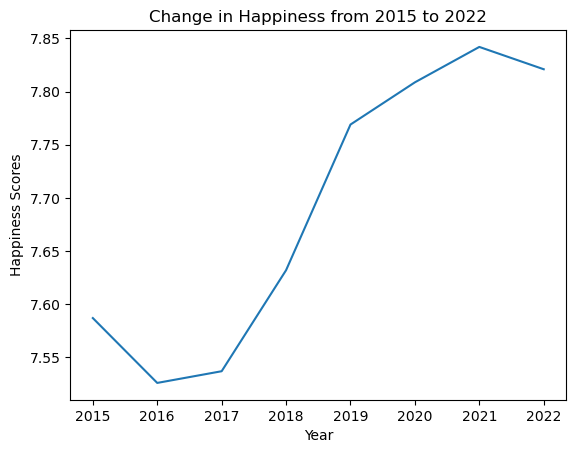

In [19]:
scores = get_happiness_scores("Finland")
plot_country(scores)